In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [21]:
# Cargar datasets
animales = pd.read_csv("animales_eeg.csv")
alimentos = pd.read_csv("alimentos_eeg.csv")
herramientas = pd.read_csv("herramientas_eeg.csv")

In [22]:
# Matrices de conectividad - correlación --> no se puede coherencia espectral, son estímulos determinados
eeg_animales = animales.loc[:, 'Fp1':]
eeg_alimentos = alimentos.loc[:, 'Fp1':]
eeg_herramientas = herramientas.loc[:, 'Fp1':]

corr_animales = eeg_animales.corr()
corr_alimentos = eeg_alimentos.corr()
corr_herramientas = eeg_herramientas.corr()

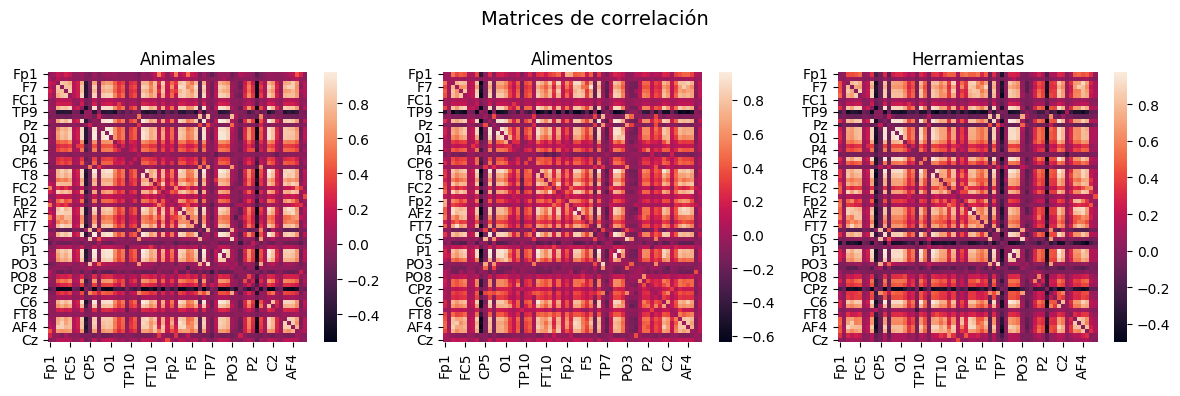

In [23]:
# Comparativa matrices de conectividad - hecha con correlación

np.fill_diagonal(corr_animales.values, 0)
np.fill_diagonal(corr_alimentos.values, 0)
np.fill_diagonal(corr_herramientas.values, 0)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(corr_animales, ax=axes[0])
axes[0].set_title("Animales")

sns.heatmap(corr_alimentos, ax=axes[1])
axes[1].set_title("Alimentos")

sns.heatmap(corr_herramientas, ax=axes[2])
axes[2].set_title("Herramientas")

fig.suptitle("Matrices de correlación", fontsize=14)
plt.tight_layout()
plt.show()

## Generación de estadísticos

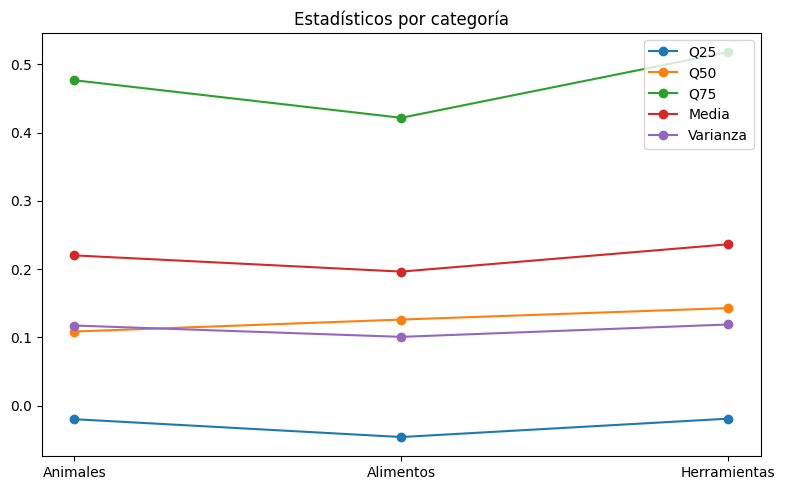

In [37]:
matrices = {
    "Animales": corr_animales,
    "Alimentos": corr_alimentos,
    "Herramientas": corr_herramientas
}

th25, th50, th75 = [], [], []
promedio, varianza = [], []
categorias = []

for nombre, matriz in matrices.items():
    data = matriz.stack().values
    categorias.append(nombre)
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(categorias, th25, marker='o', label="Q25")
ax.plot(categorias, th50, marker='o', label="Q50")
ax.plot(categorias, th75, marker='o', label="Q75")
ax.plot(categorias, promedio, marker='o', label="Media")
ax.plot(categorias, varianza, marker='o', label="Varianza")

ax.set_title("Estadísticos por categoría")
ax.legend()
plt.tight_layout()
plt.show()

## Evaluación de los estadísticos

In [38]:
# Función para filtrar la matriz 
def filter_top_connections(corr_matrix, percentile):
    
    # Create a copy to avoid modifying the original matrix
    filtered_matrix = corr_matrix.copy()

    # Set diagonal to NaN to exclude from percentile calculation
    np.fill_diagonal(filtered_matrix.values, np.nan)

    # Get all off-diagonal values and calculate the threshold
    # Use absolute values for 'strongest' connections
    abs_values = np.abs(filtered_matrix.values[~np.isnan(filtered_matrix.values)])

    # If there are no off-diagonal values, return a matrix of zeros
    if abs_values.size == 0:
        return corr_matrix * 0.0

    threshold = np.percentile(abs_values, 100 - percentile) # Top X% means threshold at 100-X percentile

    # Apply the filter: set values below threshold to 0
    # Also keep values between -threshold and threshold to 0 if they are not above threshold
    filtered_matrix[np.abs(filtered_matrix) < threshold] = 0

    # Set diagonal back to 1 (or 0 if preferred, but 1 is standard for correlation diagonals)
    np.fill_diagonal(filtered_matrix.values, 1.0)

    return filtered_matrix

Text(0.5, 0.98, 'Análisis estadísticos para categoría: animales')

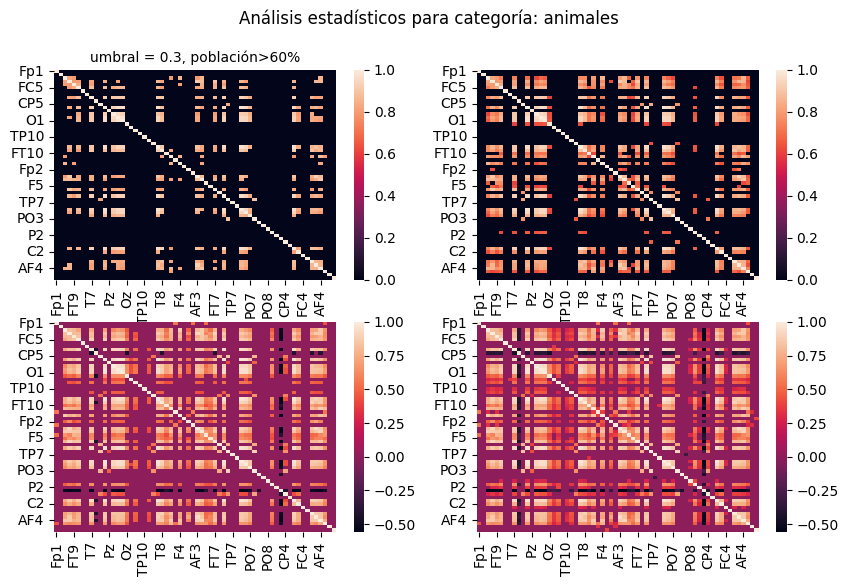

In [42]:
# ANIMALES

corr_animales.values[np.arange(len(corr_animales)),
                     np.arange(len(corr_animales))] = 0

animales_df_1 = filter_top_connections(corr_animales, 10)
animales_df_2 = filter_top_connections(corr_animales, 20)
animales_df_3 = filter_top_connections(corr_animales, 30)
animales_df_4 = filter_top_connections(corr_animales, 40)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

sns.heatmap(animales_df_1, ax=axes[0, 0])
sns.heatmap(animales_df_2, ax=axes[0, 1])
sns.heatmap(animales_df_3, ax=axes[1, 0])
sns.heatmap(animales_df_4, ax=axes[1, 1])
axes[0,0].set_title("umbral = 0.3, población>60%", fontsize = 10)
fig.suptitle('Análisis estadísticos para categoría: animales')